# Task 1: Sales Data Analysis for a Commercial Store

## Overview
This task involves creating a **sales data analysis** for a commercial store, focusing on key aspects like sales trends, product performance, and customer behavior. The analysis will be conducted using various techniques such as Exploratory Data Analysis (EDA) and data visualizations.

### Objectives:
- Collect and analyze sales data for a commercial store.
- Perform **Exploratory Data Analysis (EDA)** to uncover trends and insights.
- Visualize data with charts and graphs to communicate findings effectively.

### Data Columns:
- **Unnamed: 0**: Index column (usually not useful for analysis)
- **Order ID**: Unique identifier for each order
- **Product**: Name of the product sold
- **Quantity Ordered**: Number of units ordered
- **Price Each**: Price per unit of the product
- **Order Date**: Date of the order
- **Purchase Address**: Address where the order was delivered
- **Month**: Month in which the sale occurred
- **Sales**: Total sales value (Quantity Ordered * Price Each)
- **City**: City where the order was placed
- **Hour**: Hour of the day when the order was placed

### Tools:
- **Libraries**: Use Python libraries such as Pandas, Matplotlib, Seaborn, and NumPy for data analysis and visualization.

**Brainwave Matrix Solutions**


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales=pd.read_csv("Sales Data.csv")
display(sales.head())

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
sales.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [4]:
sales.shape

(185950, 11)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [6]:
sales.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [7]:
sales.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

## Remove unnecessary index column

In [8]:
if 'Unnamed: 0' in sales.columns:
    sales = sales.drop(columns=['Unnamed: 0'])

In [9]:
# Remove duplicate rows
sales = sales.drop_duplicates()

In [10]:
# Convert data types
sales['Order Date'] = pd.to_datetime(sales['Order Date'], errors='coerce')  
sales['Price Each'] = sales['Price Each'].astype(float)
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype(int)
sales['Sales'] = sales['Sales'].astype(float)

In [11]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [12]:
sales['Revenue'] = sales['Quantity Ordered'] * sales['Price Each']
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Revenue
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,11.95
...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,2.99
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,149.99
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,11.95
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,11.95


### Assume cost is 70% of Price Each for Profit calculation

In [13]:
sales['Cost'] = sales['Price Each'] * 0.7
sales['Profit'] = sales['Revenue'] - (sales['Cost'] * sales['Quantity Ordered'])

In [14]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Revenue,Cost,Profit
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1700.00,1190.000,510.000
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,600.00,420.000,180.000
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,11.95,8.365,3.585
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,149.99,104.993,44.997
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,11.95,8.365,3.585


## Exploratory Data Analysis (EDA)

### Overall Sales Performance

In [15]:
# Total Revenue
total_revenue = sales['Revenue'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 34465537.93999999


In [16]:
# Average Revenue per transaction
avg_revenue_per_transaction = sales['Revenue'].mean()
print("Average Revenue per Transaction:", avg_revenue_per_transaction)

Average Revenue per Transaction: 185.61193595639946


### Category/Region-Wise Analysis

In [17]:
# Revenue contribution by product category
category_revenue = sales.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
print(category_revenue)

Product
Macbook Pro Laptop            8032500.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3317400.00
27in 4K Gaming Monitor        2433147.61
34in Ultrawide Monitor        2352898.08
Apple Airpods Headphones      2345550.00
Flatscreen TV                 1443900.00
Bose SoundSport Headphones    1342865.70
27in FHD Monitor              1131074.59
Vareebadd Phone                827200.00
20in Monitor                   453818.74
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       346376.55
USB-C Charging Cable           285975.45
Wired Headphones               246082.76
AA Batteries (4-pack)          106041.60
AAA Batteries (4-pack)          92648.14
Name: Revenue, dtype: float64


In [18]:
# Regional sales distribution
regional_sales = sales.groupby('City')['Revenue'].sum().sort_values(ascending=False)
print(regional_sales)

City
San Francisco    8254743.55
Los Angeles      5448304.28
New York City    4661867.14
Boston           3658627.65
Atlanta          2794199.07
Dallas           2765373.96
Seattle          2745046.02
Portland         2319331.94
Austin           1818044.33
Name: Revenue, dtype: float64


### Trend Analysis

In [19]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
daily_sales = sales.groupby(sales['Order Date'].dt.date)['Revenue'].sum()
weekly_sales = sales.groupby(sales['Order Date'].dt.to_period('W'))['Revenue'].sum()
monthly_sales = sales.groupby(sales['Order Date'].dt.to_period('M'))['Revenue'].sum()

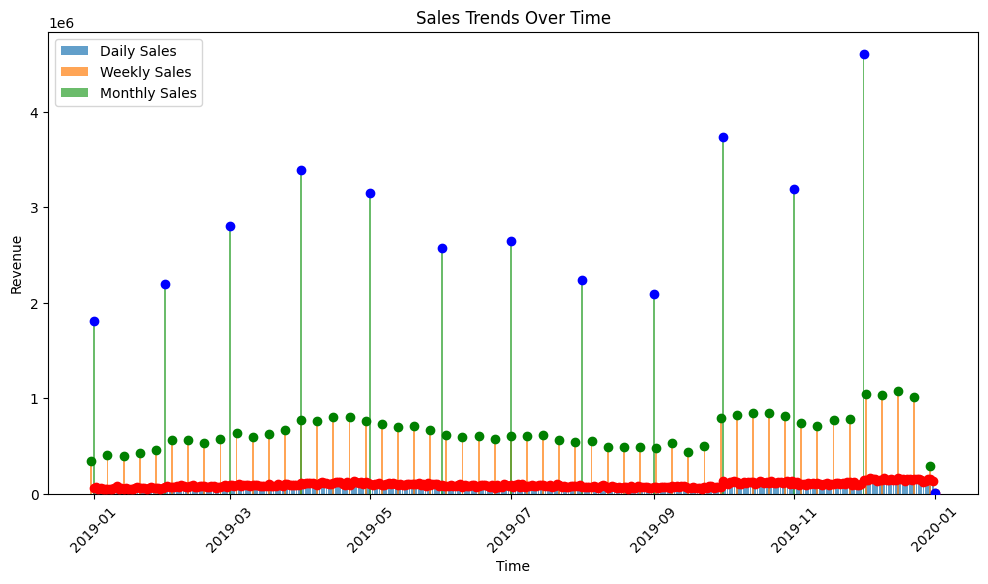

In [20]:
weekly_sales.index = weekly_sales.index.astype(str) 
weekly_sales.index = weekly_sales.index.str.split('/').str[0]  

plt.figure(figsize=(12,6))
plt.bar(daily_sales.index, daily_sales.values, label="Daily Sales", alpha=0.7)
plt.scatter(daily_sales.index, daily_sales.values, color='red', zorder=5)
plt.bar(weekly_sales.index, weekly_sales.values, label="Weekly Sales", alpha=0.7)
plt.scatter(weekly_sales.index, weekly_sales.values, color='green', zorder=5)
plt.bar(monthly_sales.index.astype(str), monthly_sales.values, label="Monthly Sales", alpha=0.7)
plt.scatter(monthly_sales.index.astype(str), monthly_sales.values, color='blue', zorder=5)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.title("Sales Trends Over Time")
plt.xticks(rotation=45)
plt.show()

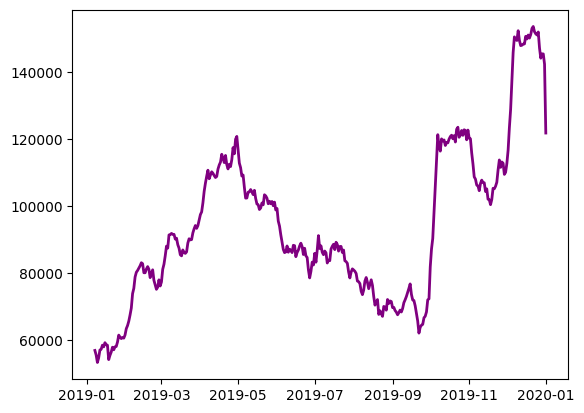

In [21]:
# 7-day moving average for daily sales 
daily_sales_smoothed = daily_sales.rolling(window=7).mean()
plt.plot(daily_sales_smoothed.index, daily_sales_smoothed.values, label="7-Day Moving Avg.", color='purple', linewidth=2)

#### The code generates a bar chart to visualize daily, weekly, and monthly sales trends with circles on top of the bars, highlighting revenue values for each time period. The chart includes different colors for each sales trend and provides clear insights into sales performance over time.

### Best-Selling Products

In [22]:
# Top 5 products by revenue
top_5_products_revenue = sales.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Revenue:", top_5_products_revenue)

Top 5 Products by Revenue: Product
Macbook Pro Laptop        8032500.00
iPhone                    4792900.00
ThinkPad Laptop           4127958.72
Google Phone              3317400.00
27in 4K Gaming Monitor    2433147.61
Name: Revenue, dtype: float64


In [23]:
# Top 5 Products by Quantity Sold
top_5_products_quantity = sales.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Quantity Sold:", top_5_products_quantity)

Top 5 Products by Quantity Sold: Product
AAA Batteries (4-pack)      30986
AA Batteries (4-pack)       27615
USB-C Charging Cable        23931
Lightning Charging Cable    23169
Wired Headphones            20524
Name: Quantity Ordered, dtype: int32


## Visualizations 

### Line Chart 

In [24]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Month'] = sales['Order Date'].dt.month
monthly_sales = sales.groupby('Month')['Sales'].sum().reset_index()

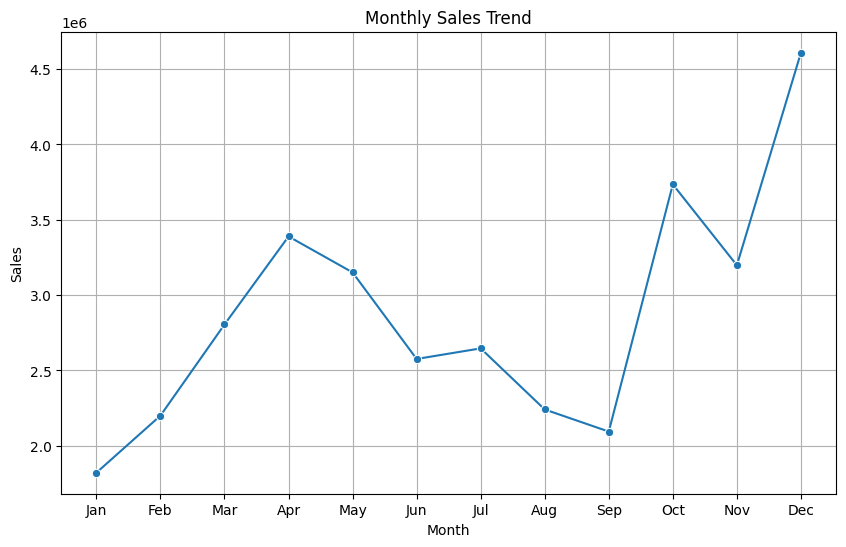

In [25]:
# Line Chart for sales trends 
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Bar Chart 

In [26]:
revenue_by_product = sales.groupby('Product')['Revenue'].sum().reset_index()
revenue_by_city = sales.groupby('City')['Revenue'].sum().reset_index()

#### Revenue by Product

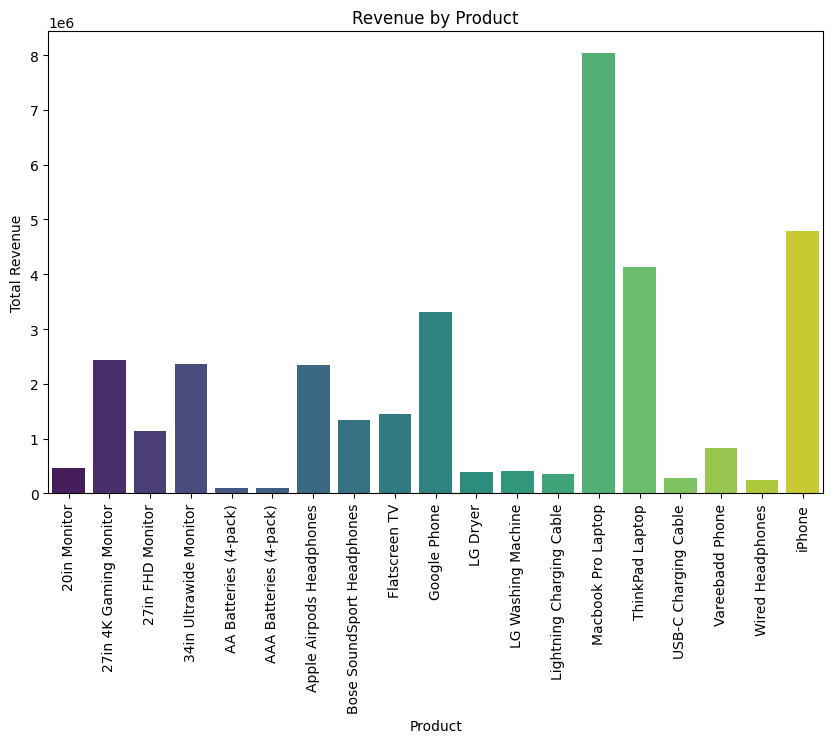

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Revenue', data=revenue_by_product, palette='viridis')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

#### Revenue by City

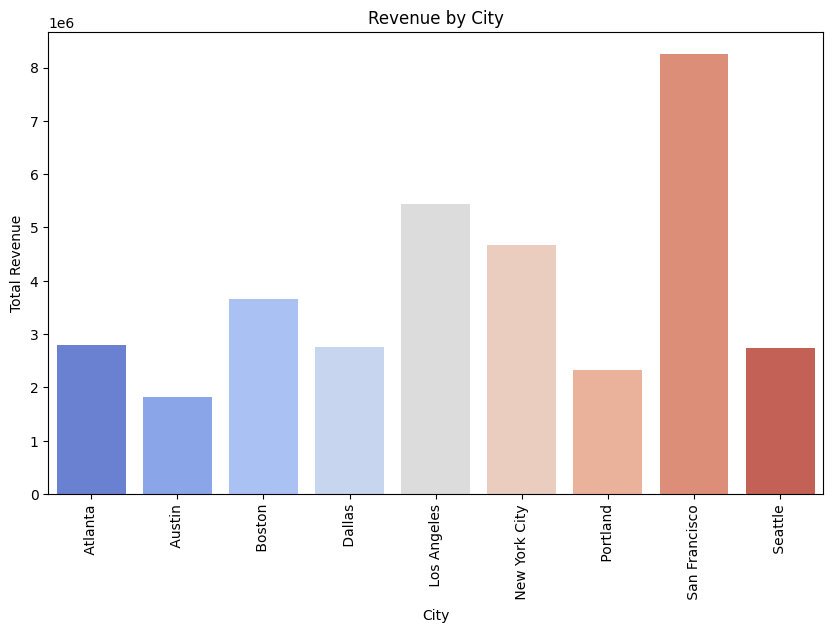

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Revenue', data=revenue_by_city, palette='coolwarm')
plt.title('Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

### Pie Chart 

In [29]:
# Calculate total sales by product or city
sales_by_product = sales.groupby('Product')['Sales'].sum()
sales_by_city = sales.groupby('City')['Sales'].sum().reset_index()

#### Sales by Product

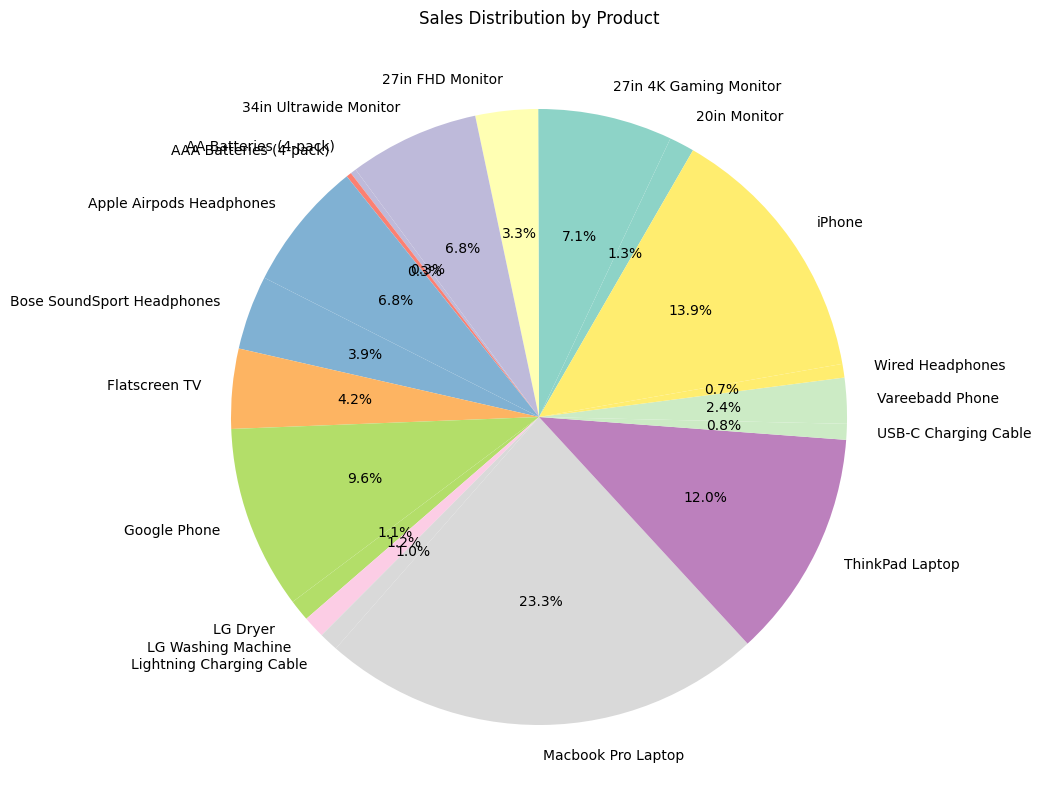

In [30]:
plt.figure(figsize=(10, 10))
sales_by_product.plot(kind='pie', autopct='%1.1f%%', startangle=60, cmap='Set3')
plt.title('Sales Distribution by Product')
plt.ylabel('')
plt.show()

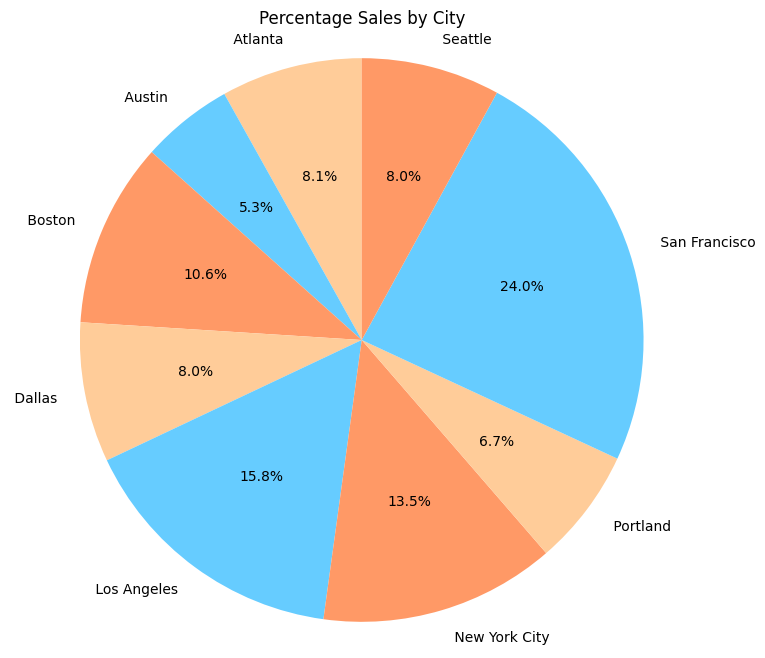

In [31]:
# Sales by City
plt.figure(figsize=(8, 8))
plt.pie(sales_by_city['Sales'], labels=sales_by_city['City'], autopct='%1.1f%%', startangle=90, colors=['#ffcc99','#66ccff','#ff9966'])
plt.title('Percentage Sales by City')
plt.axis('equal')
plt.show()

In [32]:
# Pivot table for Sales by City and Hour
heatmap_data = sales.pivot_table(index='City', columns='Hour', values='Sales', aggfunc='sum', fill_value=0)

### Heatmap 

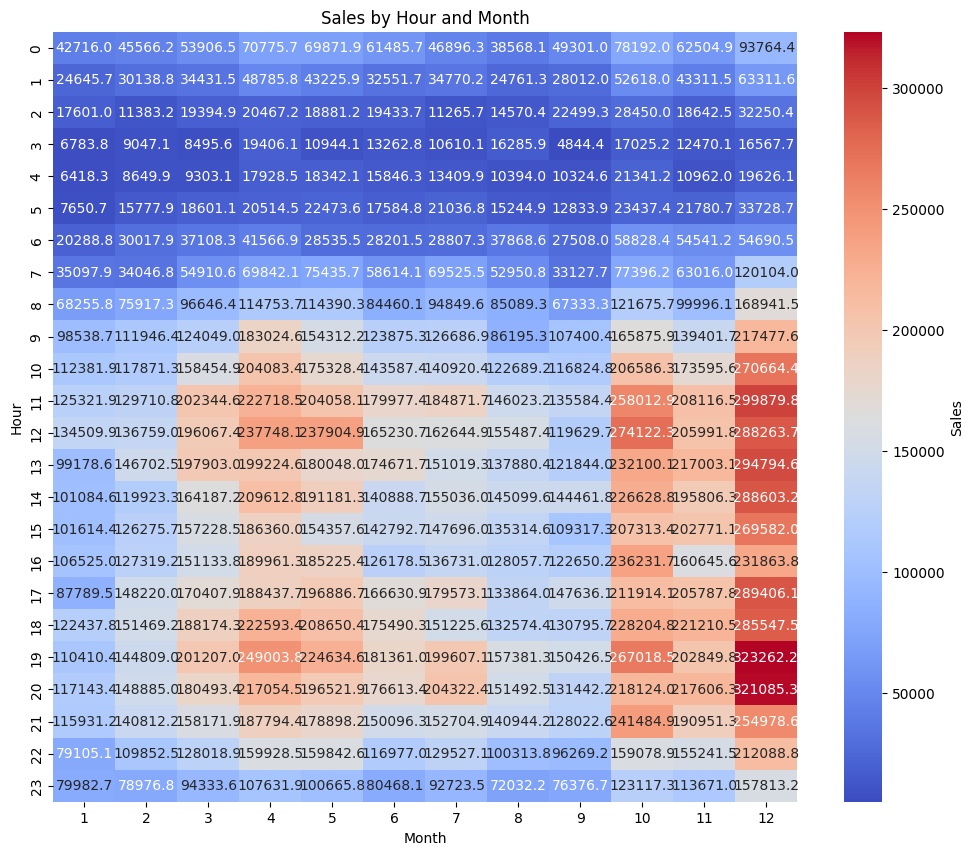

In [33]:
# Grouping by Hour and Month
hourly_monthly_sales = sales.groupby(['Hour', 'Month'])['Sales'].sum().unstack()

# Heatmap for Sales by Hour and Month
plt.figure(figsize=(12, 10))
sns.heatmap(hourly_monthly_sales, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Sales'})
plt.title('Sales by Hour and Month')
plt.xlabel('Month')
plt.ylabel('Hour')
plt.show()

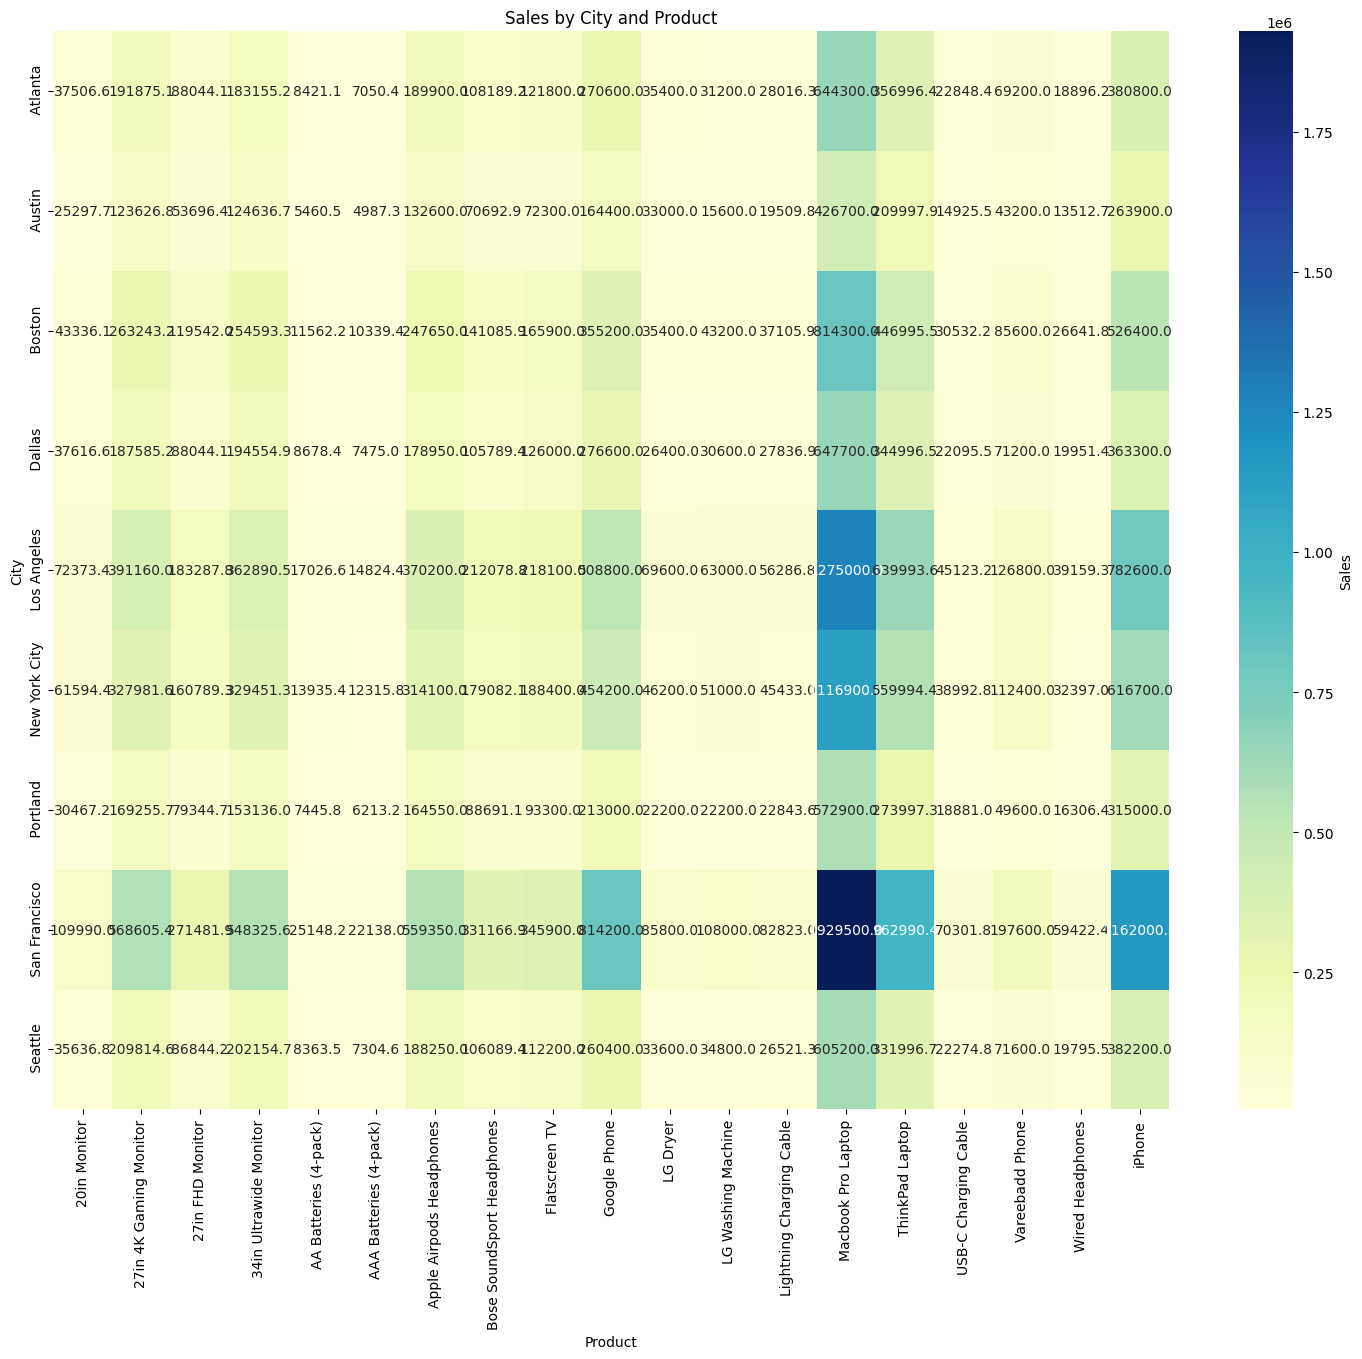

In [34]:
# Sales by City and Product 
city_product_sales = sales.groupby(['City', 'Product'])['Sales'].sum().unstack()

# Heatmap for Sales by City and Product
plt.figure(figsize=(18, 14))
sns.heatmap(city_product_sales, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Sales'})
plt.title('Sales by City and Product')
plt.xlabel('Product')
plt.ylabel('City')
plt.show()

### Scatter Plot 

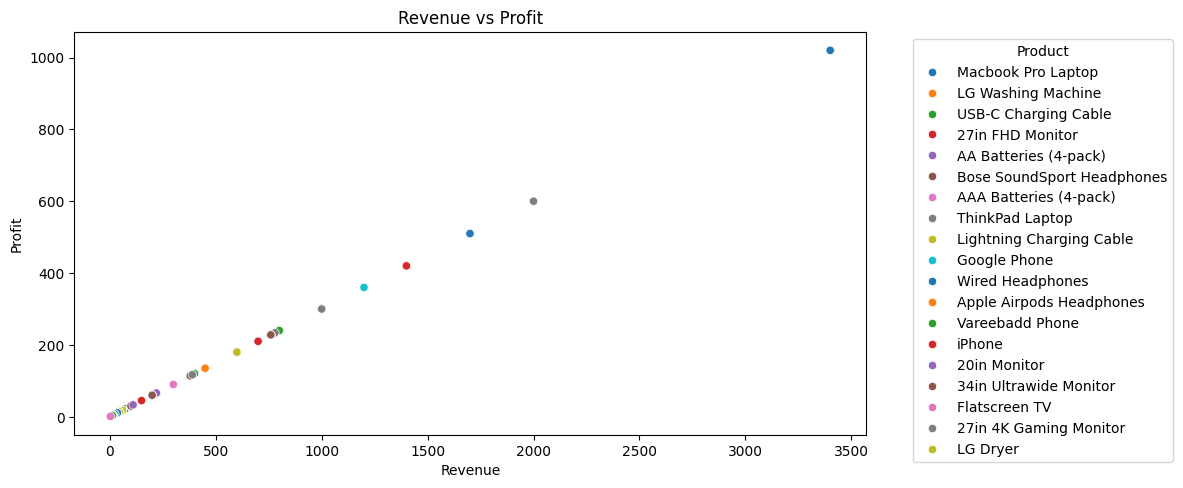

In [35]:
# Revenue vs Profit
plt.figure(figsize=(12, 5))
sns.scatterplot(data=sales, x='Revenue', y='Profit', hue='Product', palette='tab10')
plt.title('Revenue vs Profit')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Product')
plt.tight_layout()
plt.show()

### Advanced Pairplot for Multiple Numerical Columns

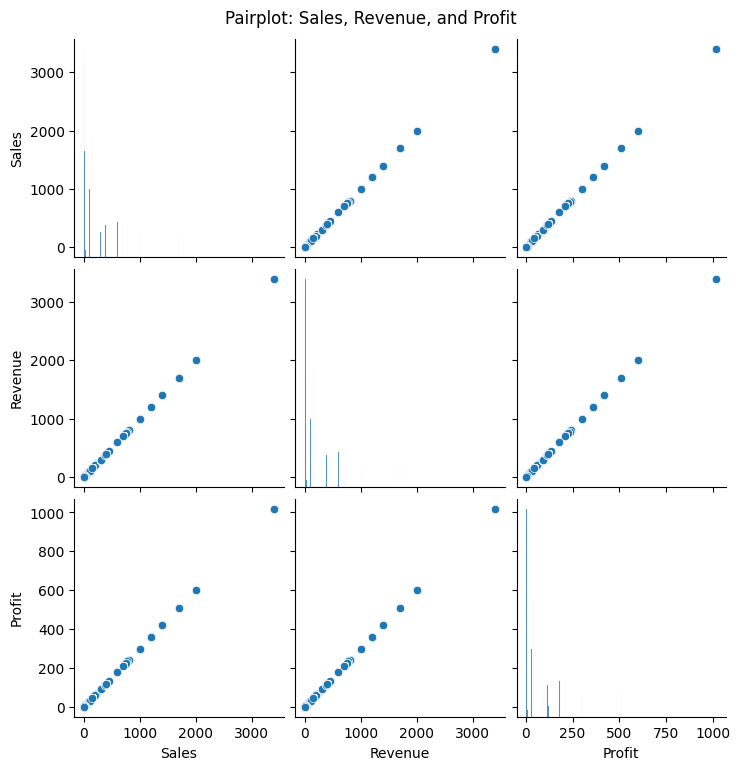

In [36]:
sales[['Sales', 'Revenue', 'Profit']] = sales[['Sales', 'Revenue', 'Profit']].apply(pd.to_numeric, errors='coerce')
sales_clean = sales.dropna(subset=['Sales', 'Revenue', 'Profit'])
sns.pairplot(sales_clean[['Sales', 'Revenue', 'Profit']], kind='scatter', palette='viridis')
plt.suptitle('Pairplot: Sales, Revenue, and Profit', y=1.02)
plt.show()

### Correlation Heatmap 

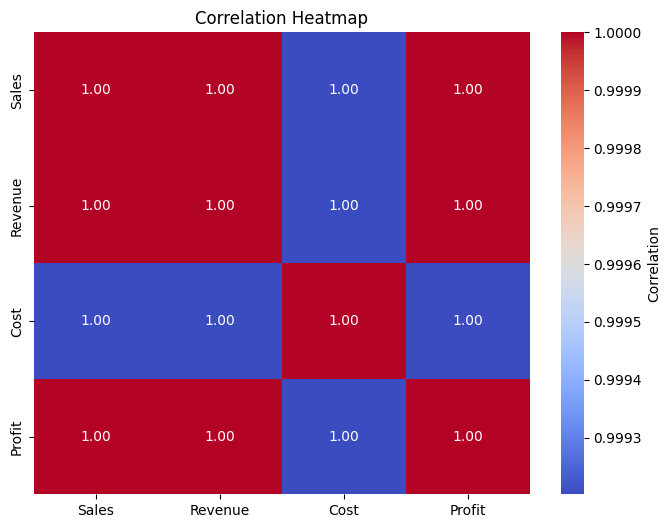

In [37]:
# Correlation matrix for numerical columns
correlation_matrix = sales[['Sales', 'Revenue', 'Cost', 'Profit']].corr()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.show()


### Boxplot 

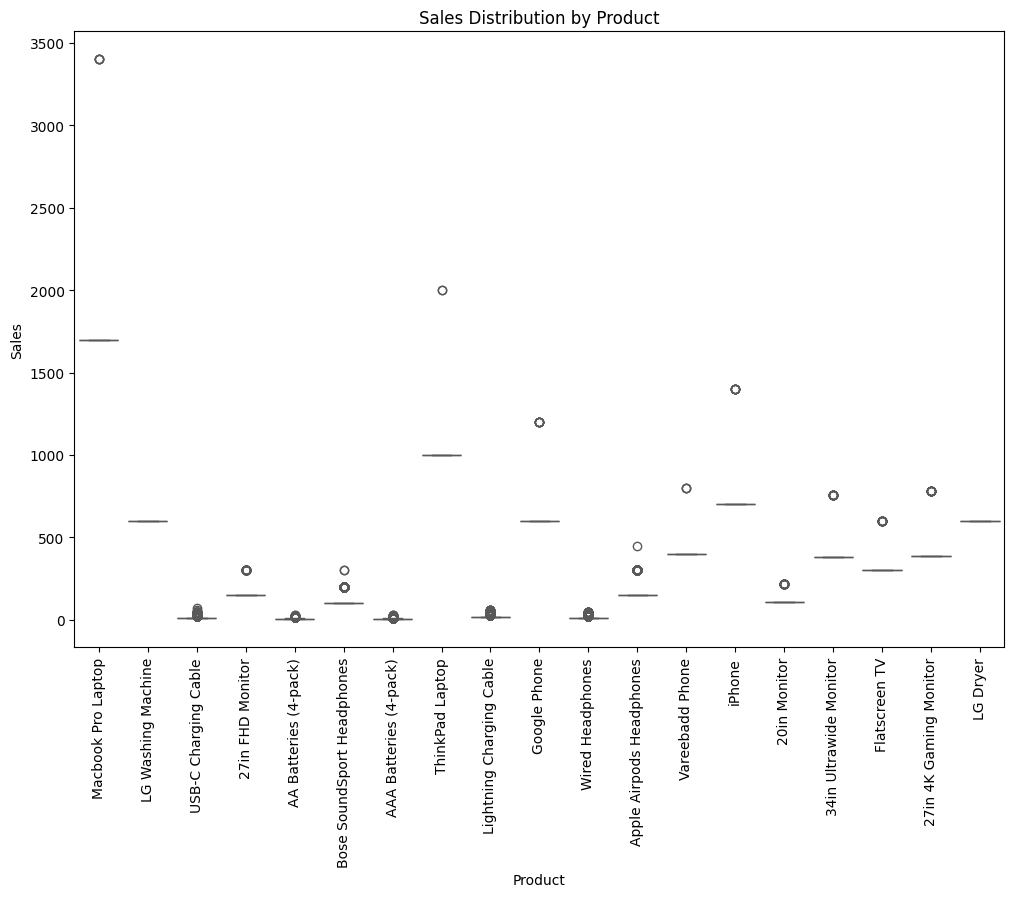

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=sales, x='Product', y='Sales', palette='Set2')
plt.title('Sales Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

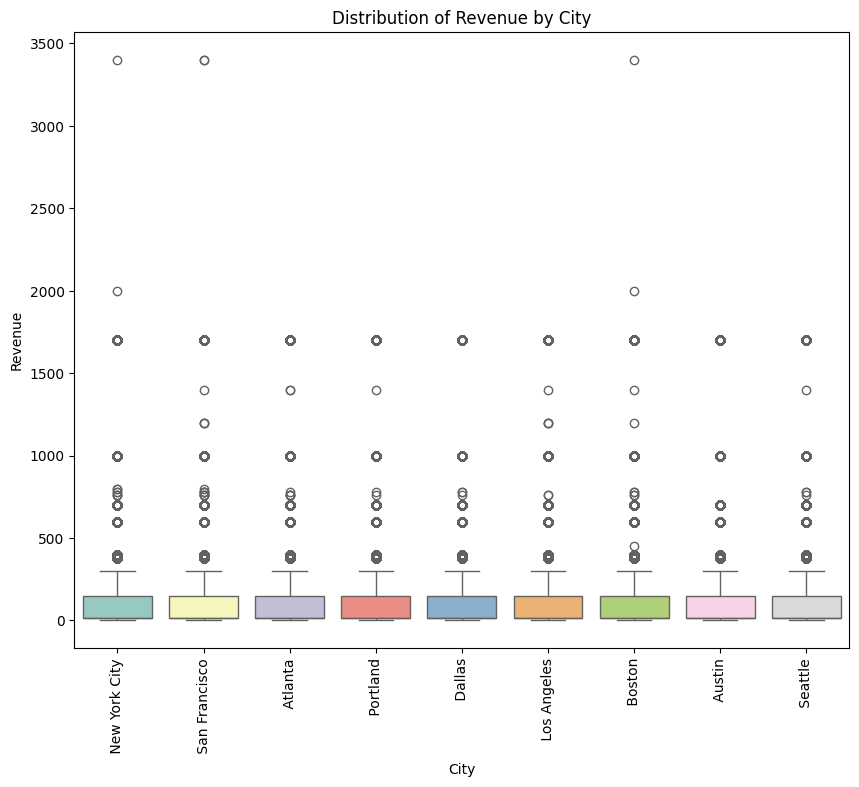

In [39]:
# Revenue by City
plt.figure(figsize=(10, 8))
sns.boxplot(x='City', y='Revenue', data=sales, palette='Set3')
plt.title('Distribution of Revenue by City')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

### Violin Plot 

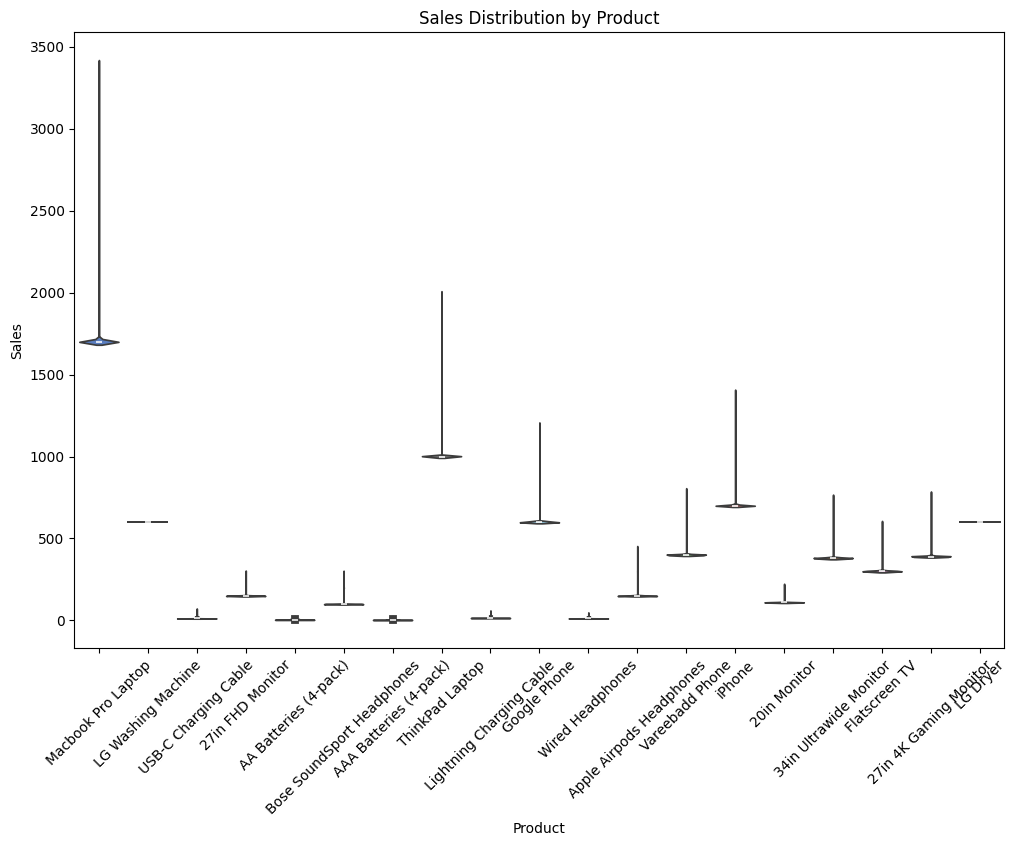

In [40]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=sales, x='Product', y='Sales', palette='muted')
plt.title('Sales Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

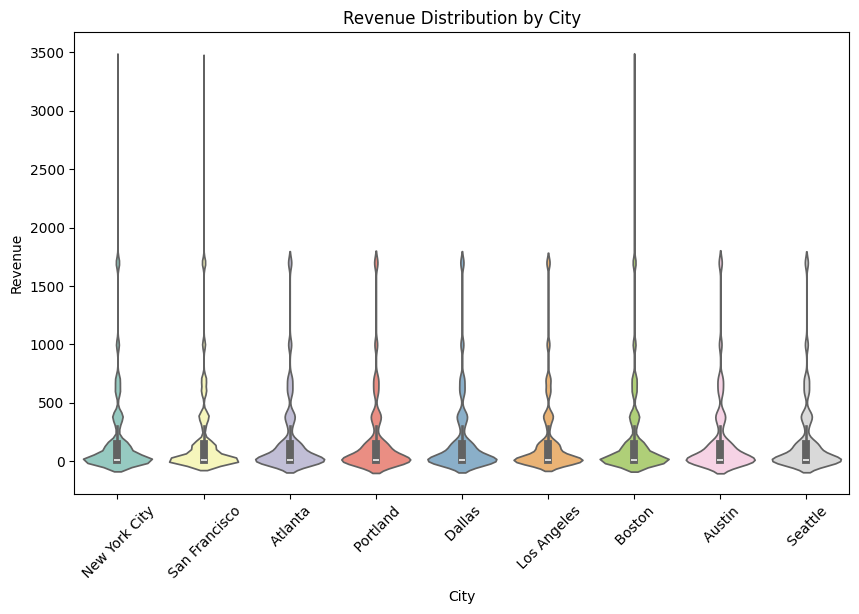

In [41]:
#  Revenue by City
plt.figure(figsize=(10, 6))
sns.violinplot(x='City', y='Revenue', data=sales, palette='Set3')
plt.title('Revenue Distribution by City')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# Key Insights and Recommendations Based on EDA and Visualizations

## Key Insights

1. **Top-Performing Products/Regions**:
   - **Insight**: Certain product categories and regions consistently contribute the most to overall revenue. Identifying these key performers allows for a deeper understanding of which offerings resonate best with customers and which geographical areas are generating significant sales.
   - **Recommendation**: Prioritize marketing and resource allocation towards these high-performing products and regions to ensure continued revenue growth. Consider optimizing stock availability and increasing focus on promotional strategies in these areas.

2. **Sales Patterns**:
   - **Insight**: Sales trends vary by time, with certain periods (e.g., specific hours or months) consistently showing higher sales. These patterns suggest that specific external factors (such as holidays, time of day, or special events) may be driving demand.
   - **Recommendation**: Align staffing, inventory, and marketing efforts with these peak sales periods. Plan promotional activities, discounts, and campaigns to coincide with these trends to maximize sales conversions.

3. **Impact of Discounts**:
   - **Insight**: The analysis of discounts reveals their impact on both revenue growth and profit margins. While discounts may drive higher sales volume, they can also erode profitability if not strategically managed.
   - **Recommendation**: Implement targeted discount strategies that focus on specific products or customer segments to ensure profitability is not compromised. Evaluate discount effectiveness through continuous A/B testing to optimize the balance between revenue growth and margin preservation.

4. **Customer Preferences**:
   - **Insight**: Analyzing quantities sold and revenue generated provides insight into customer preferences. Products with high sales volume and revenue generation reflect strong customer demand, while the distribution of sales across different regions or demographics can highlight preferences at a granular level.
   - **Recommendation**: Use customer preference data to refine product offerings, develop tailored recommendations, and personalize marketing efforts. Consider introducing new variations or complementary products to meet evolving customer demands.

---

## Preliminary Recommendations

1. **Focus on High-Revenue Categories and Allocate Resources Accordingly**:
   - Direct more attention and resources towards the product categories and regions that are contributing the most to revenue. This could involve increasing stock levels, enhancing marketing efforts, and ensuring consistent product availability to meet high demand.

2. **Expand Operations or Promotions in Top-Performing Regions**:
   - Strategically target top-performing regions with expanded operations, localized campaigns, and special promotions to maintain and grow market share. By capitalizing on the success of these regions, the business can further increase sales and brand presence.

3. **Implement Targeted Discount Strategies to Maximize Profitability**:
   - Rather than offering blanket discounts, focus on targeted promotional offers that are tailored to specific products, customer segments, or regional demands. This ensures that discounts are used strategically to drive sales without eroding profitability.

4. **Prepare Inventory and Promotional Campaigns Around Identified Peak Periods**:
   - Leverage insights into peak sales periods to align inventory planning and marketing campaigns accordingly. By being proactive during high-demand times, the business can ensure product availability and capture sales at optimal times, driving greater profitability.
ion times.
both sales volume and profit margins.
